In [4]:
import pandas as pd

data = {
    'Tweet': [
        'I love the Indian Elections, true democracy in action!',
        'So tired of all the political noise 😩',
        'Neutral on this topic, just observing.',
        'The speeches this year are better than before.',
        'Elections are messy, but necessary.',
        'Such a positive turnout this time!',
        'Can’t believe how badly managed this is.',
        'I have mixed feelings about the campaigns.',
        'Everything feels fake during election time.',
        'Good to see youth participating in voting.'
    ]
}

df = pd.DataFrame(data)
df.head()


,Tweet
0,"I love the Indian Elections, true democracy in..."
1,So tired of all the political noise 😩
2,"Neutral on this topic, just observing."
3,The speeches this year are better than before.
4,"Elections are messy, but necessary."


In [5]:
!pip install vaderSentiment

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_sentiment(tweet):
    score = analyzer.polarity_scores(tweet)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply function to each tweet
df['Sentiment'] = df['Tweet'].apply(get_sentiment)

df.head(10)


,Tweet,Sentiment
0,"I love the Indian Elections, true democracy in...",Positive
1,So tired of all the political noise 😩,Negative
2,"Neutral on this topic, just observing.",Neutral
3,The speeches this year are better than before.,Positive
4,"Elections are messy, but necessary.",Negative
5,Such a positive turnout this time!,Positive
6,Can’t believe how badly managed this is.,Negative
7,I have mixed feelings about the campaigns.,Neutral
8,Everything feels fake during election time.,Negative
9,Good to see youth participating in voting.,Positive


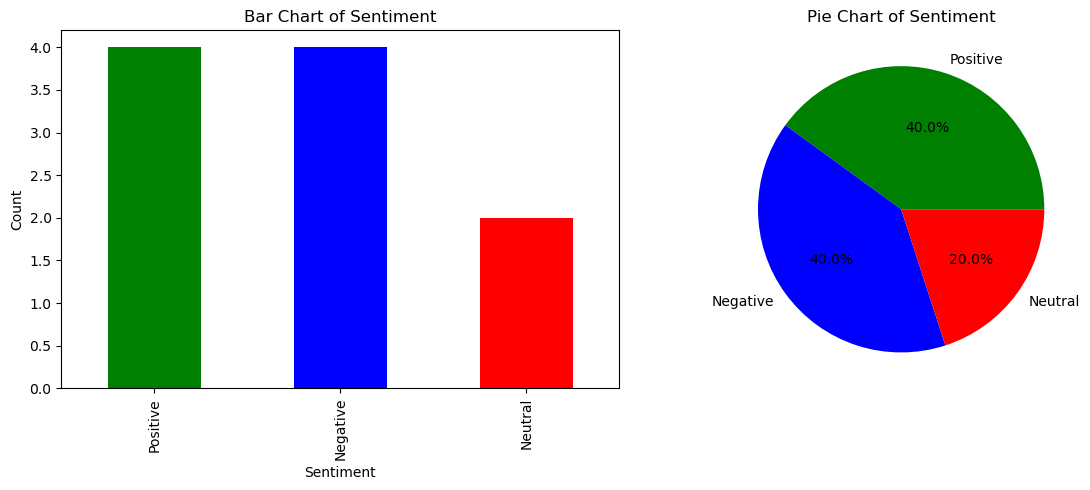

In [10]:
import matplotlib.pyplot as plt

# Get sentiment counts
sentiment_counts = df['Sentiment'].value_counts()

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Width x Height in inches

# Bar chart
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], ax=axes[0])
axes[0].set_title('Bar Chart of Sentiment')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue', 'red'], ax=axes[1])
axes[1].set_title('Pie Chart of Sentiment')
axes[1].set_ylabel('')  # Remove y-label from pie chart

# Show both plots
plt.tight_layout()
plt.show()
